This notebook shows basic illustrations phases 2 & 3 of Comet Interceptor mission
- Phase 2 : Spacecraft's station-keeping on $L_2$ halo orbit
- Phase 3 : Impulsive maneuver to leave the orbit

In [7]:
# Importing required computing packages
import numpy as np
from scipy.integrate import odeint

# Importing required plotting packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### Phase 2: Station-keeping

#### Free dynamics 

The spacecraft's free dynamics in the restricted three body problem

\begin{equation}
\begin{cases}
\dot{x} = v_x \\[.4em]
\dot{y} = v_y \\[.4em]
\dot{z} = v_z \\[.1em]
\ddot{x}=x + 2 v_y - \cfrac{(1-\mu)(x+\mu)}{r_1^3} - \cfrac{\mu(x+\mu -1 )}{r_2^3} \\[.1em]
\ddot{y}=y - 2 v_x - \cfrac{(1 - \mu)y}{r_1^3} - \cfrac{\mu y}{r_2^3} \\[.1em]
\ddot{z}=- \cfrac{(1 - \mu)z}{r_1^3} - \cfrac{\mu z}{r_2^3}
\end{cases}
\end{equation}

In [16]:
# Defining the CRTBP dynamics function
def free_dynamics(X, t):
    
    # The spacecraft's state vector X = [position velocity] at time t
    x, y, z, xdot, ydot, zdot = X
    
    # Sun-spacecraft distance
    r1 = np.sqrt((x     + mu)**2 + y**2 + z**2)
    # Earth-spacecraft distance
    r2 = np.sqrt((x - 1.+ mu)**2 + y**2 + z**2)
    
    # CRTBP normalized equations of motion in the rotating frame (already demonstrated) 
    xddot  = x + 2.*ydot - (1.-mu)*(x + mu)/r1**3 - mu*(x -1.+mu)/r2**3

    yddot  = -2.*xdot + y*(1.-(1.-mu)/r1**3 - mu/r2**3)

    zddot  = -z*((1.-mu)/r1**3 + mu/r2**3)
    
    # Returning the state's derivitive X' = [velocity acceleration]
    return np.array([xdot, ydot, zdot, xddot, yddot, zddot])

In [9]:
# Sun-Earth fundamental constant 
mu = 3.05*10**(-6) 

# State initial condition
X20 = np.array([1.00842815565444, 0, 0.0001, 0, 0.00981039306520, 0])

# Time interval of the simulation
Tmax = 3.06/2
#N = 200*Tmax+1
N =501
t2 = np.linspace(0.0, Tmax, N)

# Solving the equations of motion
X2 = odeint(free_dynamics, X20, t)

In [10]:
x2, y2, z2 = X2.T[:3]

Y2=np.zeros((len(X2),3))
Y2[:,0] = np.flipud(X2[:,0]); Y2[:,1] = np.flipud(-X2[:,1]); Y2[:,2] = np.flipud(X2[:,2])

x2 = np.append(x2,Y2[:,0]); y2 = np.append(y2,Y2[:,1]); z2 = np.append(z2,Y2[:,2])

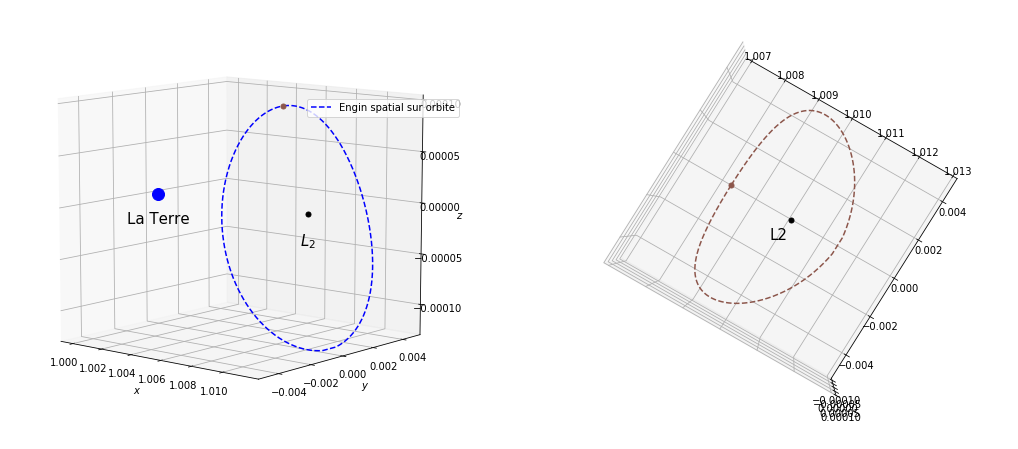

In [11]:
# Plotting the relative motion of the spacecraft
fig = plt.figure(figsize=[18, 8])

## Front view  
ax = fig.add_subplot(1, 2, 1, projection='3d')
#x,  y,  z  = X.T[:3]
ax.plot(x2, y2, z2, '--b', label='Engin spatial sur orbite')
ax.plot([x2[len(x2)-1]], [y2[len(y2)-1]], [z2[len(z2)-1]], 'oC5', markersize=5)
# Plotting the Sun and the Earth 
#ax.plot([ -mu], [0], [0], 'oy', markersize=24)
ax.plot([1-mu], [0], [0], 'ob', markersize=12)
ax.plot([1-mu+(mu/3)**(1/3)], [0], [0], 'ok', markersize=5)
ax.text(1-mu, 0, -0.00003, "La Terre", fontsize=15, horizontalalignment='center')
ax.text(1-mu+(mu/3)**(1/3), 0, -0.00003, "$L_2$", fontsize=15, horizontalalignment='center')
#ax.legend(fontsize=12)
ax.legend(bbox_to_anchor=(1,0.8), loc="upper right")
#ax.set_zlim(-0.0, 0.0002)
#ax.set_zlim(-0.0002, 0.0002)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(10,-50)

## Top view
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot(x2, y2, z2, '--C5')
ax2.plot([x2[len(x2)-1]], [y2[len(y2)-1]], [z2[len(z2)-1]], 'oC5', markersize=5)
# Plotting the Sun and the Earth 
#ax2.plot([ -mu], [0], [0], 'oy', markersize=24)
ax2.plot([1-mu], [0], [0], 'ob', markersize=12)
ax2.plot([1-mu+(mu/3)**(1/3)], [0], [0], 'ok', markersize=5)
ax2.text(1-mu+(mu/3)**(1/3), -0.001, 0, "L2", fontsize=15, horizontalalignment='center')
ax2.set_xlim(1.007, 1.013)
ax2.set_ylim(-0.005, 0.005)
ax2.view_init(90)


#### Phase 3: impulsive maneuver

#### Forced dynamics 

The spacecraft's forced dynamics (with propulsion system) in the restricted three body problem

\begin{equation}
\begin{cases}
\dot{x} = v_x \\[.4em]
\dot{y} = v_y \\[.4em]
\dot{z} = v_z \\[.1em]
\ddot{x}=x + 2 v_y - \cfrac{(1-\mu)(x+\mu)}{r_1^3} - \cfrac{\mu(x+\mu -1 )}{r_2^3} + \cfrac{T_x}{m}\delta(t-t_D)\\[.1em]
\ddot{y}=y - 2 v_x - \cfrac{(1 - \mu)y}{r_1^3} - \cfrac{\mu y}{r_2^3} + \cfrac{T_y}{m}\delta(t-t_D)\\[.1em]
\ddot{z}=- \cfrac{(1 - \mu)z}{r_1^3} - \cfrac{\mu z}{r_2^3} +\cfrac{T_z}{m}\delta(t-t_D)
\end{cases}
\end{equation}

In [12]:
def forced_dynamics(Z, t):

    x, y, z, xdot, ydot, zdot = Z[:6]
    ux, uy, uz = Z[6:]
    r1 = np.sqrt((x      + mu)**2 + y**2 + z**2)
    r2 = np.sqrt((x - 1. + mu)**2 + y**2 + z**2)
    
    
    xddot  = x + 2.*ydot - (1.-mu)*(x + mu)/r1**3 - mu*(x -1.+mu)/r2**3 + ux

    yddot  = -2.*xdot + y*(1. - (1.-mu)/r1**3 - mu/r2**3) + uy

    zddot  = -z * ((1. - mu)/r1**3 + mu/r2**3) + uz

    return np.array([xdot, ydot, zdot, xddot, yddot, zddot, 0, 0, 0])

In [13]:
# Halo orbit's half period
Thalf0  = 1.700458
# Halo orbit's period
T0      = 2.3*Thalf0
# Time interval
N_half  = 200
t_orbit = T0 * np.linspace(0.0, 1.0, 2*N_half+1)

#### Impulse control vector ####
# The chemical rocket's thrust (N)
Thrust = np.array([4, -8, 2])

# The spacecraft's masse (Kg)
mass = 1000

# The control vector (instantaneous acceleration)
u = Thrust/mass 

#### Time of the maneuver and initial state ####
# The impulse is applied at a random instant t_impulse
t_impulse = np.where(t2 == np.random.choice(t2, 1))
print(t_impulse)
# The length of the impulse needs to be signifantly short 
len_impulse = 5

# The maneuver's time interval 
t_maneuver = t2[int(t_impulse[0]):int(t_impulse[0])+len_impulse]

# The spacecraft's initial state before the impulse
X0_maneuver = X2[int(t_impulse[0]),:]

# The  Z = [state vector, control vector]
Z0 = np.append(X0_maneuver, u, axis=0)

Z_maneuver = odeint(forced_dynamics, Z0, t_maneuver)

X_maneuver = Z_maneuver[:,:6]

(array([9]),)


In [14]:
# Time interval of the free trajctory after the impulsive maneuver
t_traj = T0 * np.linspace(0.0, 0.8, 2*N_half+1)

# The initial state (Final state after the impulse)
X0_free = Z_maneuver[len(Z_maneuver)-1,:6]

# 
X_free = odeint(free_dynamics, X0_free, t_traj)

# The state of the phase 3
X_phase3 = np.append(X_maneuver, X_free, axis=0)

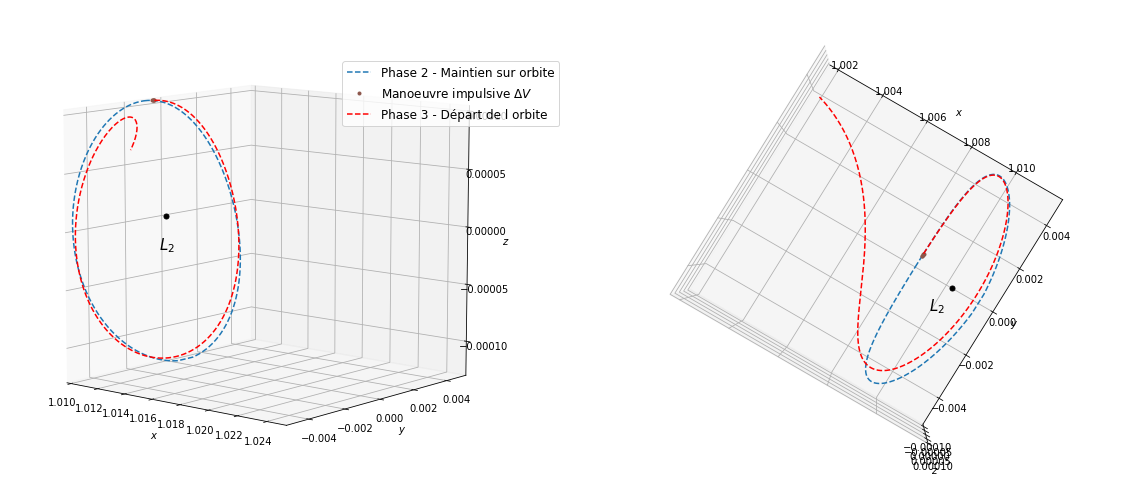

In [15]:
#Plotting the spacecraft's trajectory 
fig = plt.figure(figsize=[20, 9])

# Station-keeping on Halo orbit : Blue

# Impulsive maneuver : Black 

# Liberation trajectory : Red

# Front view
ax = fig.add_subplot(1, 2, 1, projection='3d')

x_orbit, y_orbit, z_orbit = X2.T[:3]
#ax.plot(x_orbit, y_orbit, z_orbit)
ax.plot(x2, y2, z2, '--', label='Phase 2 - Maintien sur orbite')
x_mnv, y_mnv, z_mnv = X_maneuver.T[:3]
ax.plot(x_mnv, y_mnv, z_mnv, 'oC5', markersize=3, label='Manoeuvre impulsive $\Delta V$')

x_traj, y_traj, z_traj = X_free.T[:3]
ax.plot(x_traj, y_traj, z_traj, '--r', label='Phase 3 - Départ de l orbite')


#ax.plot([1-mu], [0], [0], 'ob', markersize=12)
ax.plot([1-mu+(mu/3)**(1/3)], [0], [0], 'ok', markersize=5)
#ax.text(1-mu, 0, -0.00003, "La Terre", fontsize=15, horizontalalignment='center')
ax.text(1-mu+(mu/3)**(1/3), 0, -0.00003, "$L_2$", fontsize=15, horizontalalignment='center')

ax.legend(bbox_to_anchor=(1.1,0.9), loc="upper right", fontsize=12)
ax.set_xlim(1.01, 1.025)
#ax.set_zlim(-0.0002, 0.0002)
ax.view_init(10,-50)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

# Top view
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

#ax2.plot(x_traj, y_traj, z_traj, 'r')
ax2.plot([1-mu+(mu/3)**(1/3)], [0], [0], 'ok', markersize=5)
#ax.text(1-mu, 0, -0.00003, "La Terre", fontsize=15, horizontalalignment='center')
ax2.text(1-mu+(mu/3)**(1/3), -0.001, 0, "$L_2$", fontsize=15, horizontalalignment='center')

ax2.plot(x2, y2, z2, '--', label='Phase 2 - Maintien sur orbite')

ax2.plot(x_mnv, y_mnv, z_mnv, 'oC5', markersize=3, label='Manoeuvre impulsive $\Delta V$')

ax2.plot(x_traj, y_traj, z_traj, '--r', label='Phase 3 - Départ de l orbite')

ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_zlabel('$z$')
ax2.view_init(90)